# Praktische Übung 3 - Lösung

### Aufgabe 1: 

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("../data/titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df_selection = df[["Survived", "Pclass", "Age", "SibSp", "Parch", "Fare"]]
df_selection.head()

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500


In [4]:
from sklearn.model_selection import train_test_split

df_X = df_selection.drop(columns = ["Survived"])
df_y = df_selection["Survived"]
X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.2, random_state=0)

In [5]:
X_train.isna().sum()

Pclass      0
Age       141
SibSp       0
Parch       0
Fare        0
dtype: int64

Die nun folgende Codezeile verhindert eine Warnung, welche die danachfolgende Codezeile sonst (fälschlicherweiße) ausgeben würde.

In [6]:
pd.options.mode.chained_assignment = None  # avoid slide-copy-warning 

Jetzt können die fehlenden Felder der `Age`-Spalte mit dem Mean aufgefüllt werden.

In [7]:
age_mean = X_train['Age'].mean()
print("Age mean:", age_mean)
X_train['Age'] = X_train['Age'].fillna(age_mean)
X_train.isna().sum()

Age mean: 29.745183887915935


Pclass    0
Age       0
SibSp     0
Parch     0
Fare      0
dtype: int64

In [8]:
X_train.head()

,Pclass,Age,SibSp,Parch,Fare
140,3,29.745184,0,2,15.2458
439,2,31.000000,0,0,10.5000
817,2,31.000000,1,1,37.0042
378,3,20.000000,0,0,4.0125
491,3,21.000000,0,0,7.2500


### Aufgabe 2: 

In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)
X_scaled = scaler.transform(X_train)

In [10]:
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression(max_iter=1000) # Gradient Descent mit max. 1000 Schritten
logisticRegr.fit(X_scaled, y_train)

LogisticRegression(max_iter=1000)

N/As löschen und features skalieren:

In [11]:
X_test = X_test.dropna()
X_test_scaled = scaler.transform(X_test)
X_test.shape

(143, 5)

Die N/A-Zeilen auch aus `y_test` entfernen:

In [12]:
y_test = y_test[X_test.index]
y_test.shape

(143,)

In [13]:
predictions = logisticRegr.predict(X_test_scaled)

In [14]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
print("Accuracy", accuracy_score(y_test, predictions))
print("Precision", precision_score(y_test, predictions))
print("Recall", recall_score(y_test, predictions))

Accuracy 0.7272727272727273
Precision 0.75
Recall 0.5084745762711864


### Aufgabe 3: 

In [15]:
df_more_features = df[["Survived", "Pclass", "Age", "SibSp", "Parch", "Fare", "Embarked", "Sex"]]
df_more_features.head(3)

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,Sex
0,0,3,22.0,1,0,7.2500,S,male
1,1,1,38.0,1,0,71.2833,C,female
2,1,3,26.0,0,0,7.9250,S,female


In [16]:
onehot_embarked = pd.get_dummies(df_more_features["Embarked"])
onehot_embarked.head(3)

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1


In [17]:
onehot_gender = pd.get_dummies(df_more_features["Sex"])
onehot_gender.head(3)

,female,male
0,0,1
1,1,0
2,1,0


In [18]:
df_X = pd.concat([df_more_features, onehot_embarked, onehot_gender], axis=1)
df_X = df_X.drop(columns = ["Survived", "Embarked", "Sex"], axis=1)
df_y = df_more_features["Survived"]
df_X.head(3)

,Pclass,Age,SibSp,Parch,Fare,C,Q,S,female,male
0,3,22.0,1,0,7.2500,0,0,1,0,1
1,1,38.0,1,0,71.2833,1,0,0,1,0
2,3,26.0,0,0,7.9250,0,0,1,1,0


In [19]:
X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.2, random_state=0)
age_mean = X_train['Age'].mean()
X_train['Age'] = X_train['Age'].fillna(age_mean)

In [20]:
scaler = StandardScaler().fit(X_train)
X_scaled = scaler.transform(X_train)

In [21]:
logisticRegr = LogisticRegression(max_iter=1000) # Gradient Descent mit max. 1000 Schritten
logisticRegr.fit(X_scaled, y_train)

LogisticRegression(max_iter=1000)

In [22]:
X_test = X_test.dropna()
X_test_scaled = scaler.transform(X_test)
y_test = y_test[X_test.index]

In [23]:
predictions = logisticRegr.predict(X_test_scaled)
print("Accuracy", accuracy_score(y_test, predictions))
print("Precision", precision_score(y_test, predictions))
print("Recall", recall_score(y_test, predictions))

Accuracy 0.8041958041958042
Precision 0.7540983606557377
Recall 0.7796610169491526


### Bonus:

In [24]:
df_wCabin = df[["Survived", "Pclass", "Age", "SibSp", "Parch", "Fare", "Embarked", "Sex", "Cabin"]]
df_wCabin["Deck"] =  df_wCabin["Cabin"].str.slice(0,1)
df_wCabin.head(7)

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,Sex,Cabin,Deck
0,0,3,22.0,1,0,7.2500,S,male,NaN,NaN
1,1,1,38.0,1,0,71.2833,C,female,C85,C
2,1,3,26.0,0,0,7.9250,S,female,NaN,NaN
3,1,1,35.0,1,0,53.1000,S,female,C123,C
4,0,3,35.0,0,0,8.0500,S,male,NaN,NaN
5,0,3,NaN,0,0,8.4583,Q,male,NaN,NaN
6,0,1,54.0,0,0,51.8625,S,male,E46,E


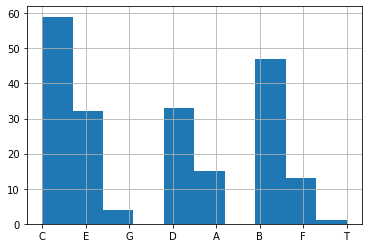

In [25]:
df_wCabin["Deck"].hist()

In [26]:
onehot_embarked = pd.get_dummies(df_wCabin["Embarked"])
onehot_gender = pd.get_dummies(df_wCabin["Sex"])
onehot_cabin = pd.get_dummies(df_wCabin["Deck"])
onehot_cabin.head(3)

,A,B,C,D,E,F,G,T
0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0


Wir wir sehen können, werden N/A-Werte beim One-hot-encoding mit einer Null-Zeile dargestellt, d.h. es ist kein Auffüllen notwendig.

In [27]:
df_X = pd.concat([df_wCabin, onehot_embarked, onehot_gender, onehot_cabin], axis=1)
df_X = df_X.drop(columns = ["Survived", "Embarked", "Sex", "Cabin", "Deck"], axis=1)
df_y = df_wCabin["Survived"]
df_X.head(3)

,Pclass,Age,SibSp,Parch,Fare,C,Q,S,female,male,A,B,C,D,E,F,G,T
0,3,22.0,1,0,7.2500,0,0,1,0,1,0,0,0,0,0,0,0,0
1,1,38.0,1,0,71.2833,1,0,0,1,0,0,0,1,0,0,0,0,0
2,3,26.0,0,0,7.9250,0,0,1,1,0,0,0,0,0,0,0,0,0


In [28]:
X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.2, random_state=0)
age_mean = X_train['Age'].mean()
X_train['Age'] = X_train['Age'].fillna(age_mean)

In [29]:
scaler = StandardScaler().fit(X_train)
X_scaled = scaler.transform(X_train)

In [30]:
logisticRegr = LogisticRegression(max_iter=1000) # Gradient Descent mit max. 1000 Schritten
logisticRegr.fit(X_scaled, y_train)

LogisticRegression(max_iter=1000)

In [31]:
X_test = X_test.dropna()
X_test_scaled = scaler.transform(X_test)
y_test = y_test[X_test.index]

In [32]:
predictions = logisticRegr.predict(X_test_scaled)
print("Accuracy", accuracy_score(y_test, predictions))
print("Precision", precision_score(y_test, predictions))
print("Recall", recall_score(y_test, predictions))

Accuracy 0.8181818181818182
Precision 0.7796610169491526
Recall 0.7796610169491526
